# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

In [75]:
# a teď už je to na vás 💪
# níže vložte své řešení
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.gridspec as gridspec


## Příprava dat

Nejdříve si načteme jednotlivé datasety a prozkoumáme základní informace o nich.

In [76]:
intakes = pd.read_csv('intakes.csv')
outcomes = pd.read_csv('outcomes.csv')

In [77]:
intakes.info()
intakes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [78]:
outcomes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


In [79]:
outcomes.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


Prozkoumejme nejdříve důkladně dataset `intakes`. Oba datasety jsou si velmi podobné a budeme předpokládat, že problémy budou analogické.

In [80]:
intakes.nunique()

Animal ID           123890
Name                 23544
DateTime             97442
MonthYear              103
Found Location       58367
Intake Type              6
Intake Condition        15
Animal Type              5
Sex upon Intake          5
Age upon Intake         54
Breed                 2741
Color                  616
dtype: int64

### Přetypování dat
Nyní přetypujeme jednotlivé příznaky podle zadání.
Nejdříve se zameříme se nominální příznaky. 
Zjevně se jedná o příznaky `Intake Type`, `Animal Type`, `Sex upon Intake`, `Breed` a `Color`.

In [81]:
nominal = ['Intake Type', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color']
intakes[nominal] = intakes[nominal].astype('category')
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Animal ID         138585 non-null  object  
 1   Name              97316 non-null   object  
 2   DateTime          138585 non-null  object  
 3   MonthYear         138585 non-null  object  
 4   Found Location    138585 non-null  object  
 5   Intake Type       138585 non-null  category
 6   Intake Condition  138585 non-null  object  
 7   Animal Type       138585 non-null  category
 8   Sex upon Intake   138584 non-null  category
 9   Age upon Intake   138585 non-null  object  
 10  Breed             138585 non-null  category
 11  Color             138585 non-null  category
dtypes: category(5), object(7)
memory usage: 8.4+ MB


Prozkoumejme se nyní na příznak `Intake Condition`.

In [82]:
display(intakes['Intake Condition'].unique())

array(['Normal', 'Sick', 'Injured', 'Pregnant', 'Nursing', 'Aged',
       'Medical', 'Other', 'Neonatal', 'Feral', 'Behavior', 'Med Urgent',
       'Space', 'Med Attn', 'Panleuk'], dtype=object)

Název nás naváděl udělat z toho ordinální příznak, nicméně vyvodit z těchto hodnot pořadí není možné a bude to další nominální příznak.

In [83]:
intakes['Intake Condition'] = intakes['Intake Condition'].astype('category')

Podívejme se nyní na příznak `DateTime`. Ten přetypujeme na typ *datetime*. Zároveň můžeme udělat jednoduchý validity check, zda příznak `MonthYear` mu odpovídá.

In [84]:
intakes['DateTime']= pd.to_datetime(intakes['DateTime'])

intakes['MonthYear'] =  pd.to_datetime(intakes['MonthYear'], format='%B %Y')
errors = ((intakes['MonthYear'].dt.month != intakes['MonthYear'].dt.month) | (intakes['MonthYear'].dt.year != intakes['DateTime'].dt.year)).sum()
print('Numbers of missmatches in DateTime and MonthYear is', errors)

Numbers of missmatches in DateTime and MonthYear is 0


Zde vidíme, že příznak `MonthYear` přesně odpovídá, čili ho můžeme beztrestně smazat.

In [85]:
intakes.drop(columns = ['MonthYear'], inplace=True)

In [86]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138585 non-null  object        
 1   Name              97316 non-null   object        
 2   DateTime          138585 non-null  datetime64[ns]
 3   Found Location    138585 non-null  object        
 4   Intake Type       138585 non-null  category      
 5   Intake Condition  138585 non-null  category      
 6   Animal Type       138585 non-null  category      
 7   Sex upon Intake   138584 non-null  category      
 8   Age upon Intake   138585 non-null  object        
 9   Breed             138585 non-null  category      
 10  Color             138585 non-null  category      
dtypes: category(6), datetime64[ns](1), object(4)
memory usage: 6.4+ MB


Prozkoumejme nyní příznak `Animal ID`. Víme, že mu nechybí žádné hodnoty a na první pohled se zdá, že ID se skládá z písmene A a 6 číslic.

In [87]:
notIDs = (~intakes['Animal ID'].str.match(r'A\d{6}')).sum()
print('# of wrong Animal IDs is ', notIDs )

# of wrong Animal IDs is  0


Vidíme tedy, že příznak je v pořádku a nebudeme jej měnit.
Podíváme se nyní na příznak `Name`. Prozkoumáme nevyhovující hodnoty základní regulárního výrazu pro jména.

In [88]:
intakes[intakes['Name'].str.match(r'^[a-zA-Z\s\.,\'-]+$') == False]['Name']

0              *Brock
7               *Ella
11             *Casey
13        *Candy Cane
14             *Pearl
             ...     
138575        A855982
138577         *Timon
138581        A855811
138582        A855815
138583        *Pumbaa
Name: Name, Length: 34810, dtype: object

Zde vidíme, že se často objevují na začátku jmen hvězdičky, které považujeme za chybu a taky je odstraníme.

In [89]:
intakes['Name'] = intakes['Name'].str.removeprefix('*')
intakes[intakes['Name'].str.match(r'^[a-zA-Z\s\.,\'-]+$') == False]['Name']

153          A839199
186       #9 Cassidy
311          A836901
455          A842896
467          A832921
             ...    
138571       A855983
138574       A855994
138575       A855982
138581       A855811
138582       A855815
Name: Name, Length: 2634, dtype: object

Všimneme si, že často se v tomto příznaku vyskytují jejich `Animal ID`, který už máme.A tedy všechny taková jména změníme na NaN. 

In [90]:
intakes.loc[intakes['Name'].str.match(r'A\d{6}') == True, 'Name'] = np.nan 

In [91]:
intakes[intakes['Name'].str.match(r'^[a-zA-Z\s\.,\'-]+$') == False]['Name'].unique()


array(['#9 Cassidy', '096', 'Puppy 3', '234 Grams', 'Muñeca', '334 Grams',
       '392 Grams', '50G', '80 G', '168 Grams', '015', 'Rooster  D10',
       '330 Grams', '161 Grams', 'Erine W/ Bert', '013', '350 Grams',
       '158 G', 'Sophie*', '117G', '055', '183 Grams', '198 Grams',
       '83 Grams', 'Joh-2', '264G', '070', '355 Grams', '028', '281 G',
       'Rooster 28', '285 Grams', '106 Red Mark', '147 Grams', '$Kittlez',
       'Bunny1', 'Louie 2', 'Organa (Ana)', '140', '195 Grams',
       '314 Grams', 'Puppy 1', '486 G-Yellow Mark', 'Lisa 140G',
       'Eddie 2', '95 Grams', '281 Grams', 'Flash 2',
       '295 Grams- Pink Mark', '210 Grams', '054', 'Céline', '108',
       '215 Grams', '069', 'Polar( Pear )', '89 G', 'Amélie', '71 Grams',
       '336 Grams', '136', '300 Grams', 'Red 271', '81 Grams', '227 G',
       'R7', 'Woodchuck 20', '330 G', '213 Grams', 'Abe 158G', '064',
       '289 Grams', '075', '245 Grams', '190G', '311 Grams', '314 G',
       'Sc-100918-1', '247 Grams

Rychlým náhledem na dané hodnoty posoudíme, že se jedná spíše o chyby a hodnoty odstraníme.

In [92]:
intakes.loc[intakes['Name'].str.match(r'^[a-zA-Z\s\.,\'-]+$') == False, 'Name'] = np.nan 

Nakonec se podíváme na konverzi `Age Upon Intake` na numerický příznak.

In [93]:
intakes['Age upon Intake'].unique()

array(['2 years', '8 years', '11 months', '4 weeks', '4 years', '6 years',
       '6 months', '5 months', '14 years', '1 month', '2 months',
       '18 years', '9 years', '4 months', '1 year', '3 years', '4 days',
       '1 day', '5 years', '2 weeks', '15 years', '7 years', '3 weeks',
       '3 months', '12 years', '1 week', '9 months', '10 years',
       '10 months', '7 months', '8 months', '1 weeks', '5 days',
       '0 years', '2 days', '11 years', '17 years', '3 days', '13 years',
       '5 weeks', '19 years', '6 days', '16 years', '20 years',
       '-1 years', '22 years', '23 years', '-2 years', '21 years',
       '-3 years', '25 years', '24 years', '30 years', '28 years'],
      dtype=object)

Vzhledem k velkému rozsahu vše zkonvertujeme na číslo vyjadřující věk v týdnech.

In [94]:
def convertToWeeks(age: str) -> float:
    if '-' in age:
        return np.nan
    num = (int)(''.join(filter(str.isdigit, age)))
    val = (''.join(filter(str.isalpha, age)))
    if 'year' in val:
        return num*365//7
    if 'month' in val:
        return num*30//7
    if 'week' in val:
        return num
    if 'day' in val:
        return num//7
    return np.nan
    
print(convertToWeeks('10 days'))
intakes['Age upon Intake'] = intakes['Age upon Intake'].apply(convertToWeeks)

1


In [95]:
intakes.dropna(subset = ['Age upon Intake'], inplace=True)
intakes['Age upon Intake'] = intakes['Age upon Intake'].astype('int64')
intakes['Age upon Intake'].unique()

array([ 104,  417,   47,    4,  208,  312,   25,   21,  730,    8,  938,
        469,   17,   52,  156,    0,  260,    2,  782,  365,    3,   12,
        625,    1,   38,  521,   42,   30,   34,  573,  886,  677,    5,
        990,  834, 1042, 1147, 1199, 1095, 1303, 1251, 1564, 1460])

In [96]:
intakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138577 entries, 0 to 138584
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138577 non-null  object        
 1   Name              94674 non-null   object        
 2   DateTime          138577 non-null  datetime64[ns]
 3   Found Location    138577 non-null  object        
 4   Intake Type       138577 non-null  category      
 5   Intake Condition  138577 non-null  category      
 6   Animal Type       138577 non-null  category      
 7   Sex upon Intake   138576 non-null  category      
 8   Age upon Intake   138577 non-null  int64         
 9   Breed             138577 non-null  category      
 10  Color             138577 non-null  category      
dtypes: category(6), datetime64[ns](1), int64(1), object(3)
memory usage: 7.5+ MB


Nyní to samé uděláme s datasetem `outcomes`.

In [97]:
outcomes.info()
outcomes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138769 non-null  object
 1   Name              97514 non-null   object
 2   DateTime          138769 non-null  object
 3   MonthYear         138769 non-null  object
 4   Date of Birth     138769 non-null  object
 5   Outcome Type      138746 non-null  object
 6   Outcome Subtype   63435 non-null   object
 7   Animal Type       138769 non-null  object
 8   Sex upon Outcome  138768 non-null  object
 9   Age upon Outcome  138764 non-null  object
 10  Breed             138769 non-null  object
 11  Color             138769 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [98]:
nominal2 = ['Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Breed', 'Color']
outcomes[nominal2] = outcomes[nominal2].astype('category')
outcomes['DateTime']= pd.to_datetime(outcomes['DateTime'])
outcomes.drop(columns = ['MonthYear'], inplace=True)
outcomes['Name'] = outcomes['Name'].str.removeprefix('*')
outcomes.loc[outcomes['Name'].str.match(r'A\d{6}') == True, 'Name'] = np.nan 
outcomes.loc[outcomes['Name'].str.match(r'^[a-zA-Z\s\.,\'-]+$') == False, 'Name'] = np.nan 

In [99]:
outcomes['Age upon Outcome'].fillna('-1', inplace=True)
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].apply(convertToWeeks)
outcomes.dropna(subset = ['Age upon Outcome'], inplace=True)
outcomes['Age upon Outcome'] = outcomes['Age upon Outcome'].astype('int64')

In [100]:
outcomes.info()
outcomes.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138756 entries, 0 to 138768
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138756 non-null  object        
 1   Name              94966 non-null   object        
 2   DateTime          138756 non-null  datetime64[ns]
 3   Date of Birth     138756 non-null  object        
 4   Outcome Type      138733 non-null  category      
 5   Outcome Subtype   63429 non-null   category      
 6   Animal Type       138756 non-null  category      
 7   Sex upon Outcome  138755 non-null  category      
 8   Age upon Outcome  138756 non-null  int64         
 9   Breed             138756 non-null  category      
 10  Color             138756 non-null  category      
dtypes: category(6), datetime64[ns](1), int64(1), object(3)
memory usage: 7.5+ MB


,Animal ID,Name,DateTime,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,104,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,07/12/2017,Adoption,NaN,Dog,Neutered Male,52,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,2020-08-16 11:38:00,08/16/2019,Euthanasia,NaN,Other,Unknown,52,Raccoon,Gray
3,A720371,Moose,2016-02-13 17:59:00,10/08/2015,Adoption,NaN,Dog,Neutered Male,17,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,2014-03-18 11:47:00,03/12/2014,Transfer,Partner,Cat,Intact Male,0,Domestic Shorthair Mix,Orange Tabby


`Date of Birth` je v tomto datasetu pro nás zbytečný příznak, jelikož si jej umíme s danou přesností odvodit z `DateTime` a `Age upon Outcome`.

In [101]:
outcomes.drop(columns = ['Date of Birth'], inplace=True)

In [102]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138756 entries, 0 to 138768
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138756 non-null  object        
 1   Name              94966 non-null   object        
 2   DateTime          138756 non-null  datetime64[ns]
 3   Outcome Type      138733 non-null  category      
 4   Outcome Subtype   63429 non-null   category      
 5   Animal Type       138756 non-null  category      
 6   Sex upon Outcome  138755 non-null  category      
 7   Age upon Outcome  138756 non-null  int64         
 8   Breed             138756 non-null  category      
 9   Color             138756 non-null  category      
dtypes: category(6), datetime64[ns](1), int64(1), object(2)
memory usage: 6.5+ MB


## Deskriptivní statistiky 

In [103]:
sns.set_style("darkgrid")

palette = sns.color_palette("hls", 10)
sns.set_palette(palette)

Začneme analýzou `DateTime`. Vzhledem k velké četnosti jednotlivých různých datumů bude nejrozumnější si daný příznak seskupit podle jednotlivých let a následně podle jedntlivých měsíců.

In [104]:
dataDT = pd.DataFrame(intakes['DateTime'])
dataDT['Month'] = dataDT['DateTime'].dt.month
dataDT['Year'] = dataDT['DateTime'].dt.year

In [105]:
# Taken from 4th notebook of BI-VIZ course
def univariate_cat_dt(df, column, title):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True) 
    })
    stats_df.sort_index(inplace=True)
    display(stats_df)
    mode = pd.DataFrame(np.array([
        ["Mode", df[column].mode()[0]], 
    ]), columns=['Name', 'Value'])
    mode.set_index('Name', inplace=True)
    display(mode)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
    fig.suptitle(title, fontsize = 18)
    sns.countplot(data=df, x=column, ax=ax1)
    
    ax1.bar_label(ax1.containers[0])
    
    ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')

,Frequency,Relative frequency
2013,4182,0.030178
2014,18656,0.134626
2015,18711,0.135022
2016,17674,0.127539
2017,17560,0.126717
2018,16977,0.122510
2019,19726,0.142347
2020,9585,0.069167
2021,12042,0.086898
2022,3464,0.024997


,Value
Name,
Mode,2019


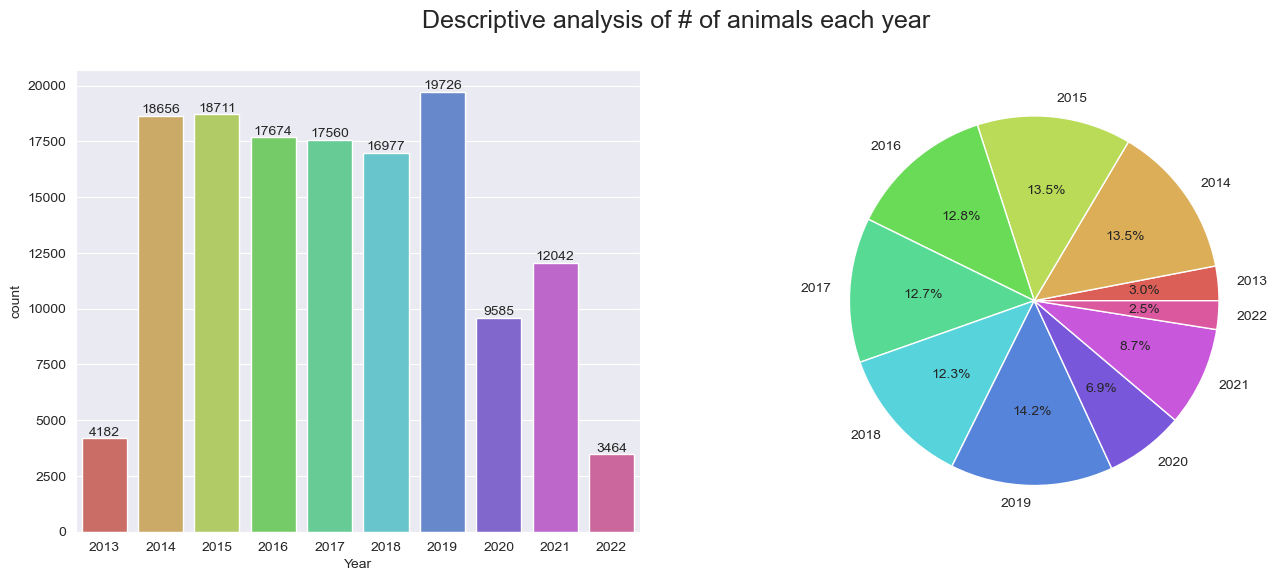

In [106]:
univariate_cat_dt(dataDT, 'Year', 'Descriptive analysis of # of animals each year')

,Frequency,Relative frequency
1,9974,0.071974
2,9135,0.065920
3,10946,0.078989
4,11253,0.081204
5,13397,0.096675
6,13421,0.096849
7,12331,0.088983
8,11861,0.085591
9,12048,0.086941
10,13110,0.094604


,Value
Name,
Mode,6


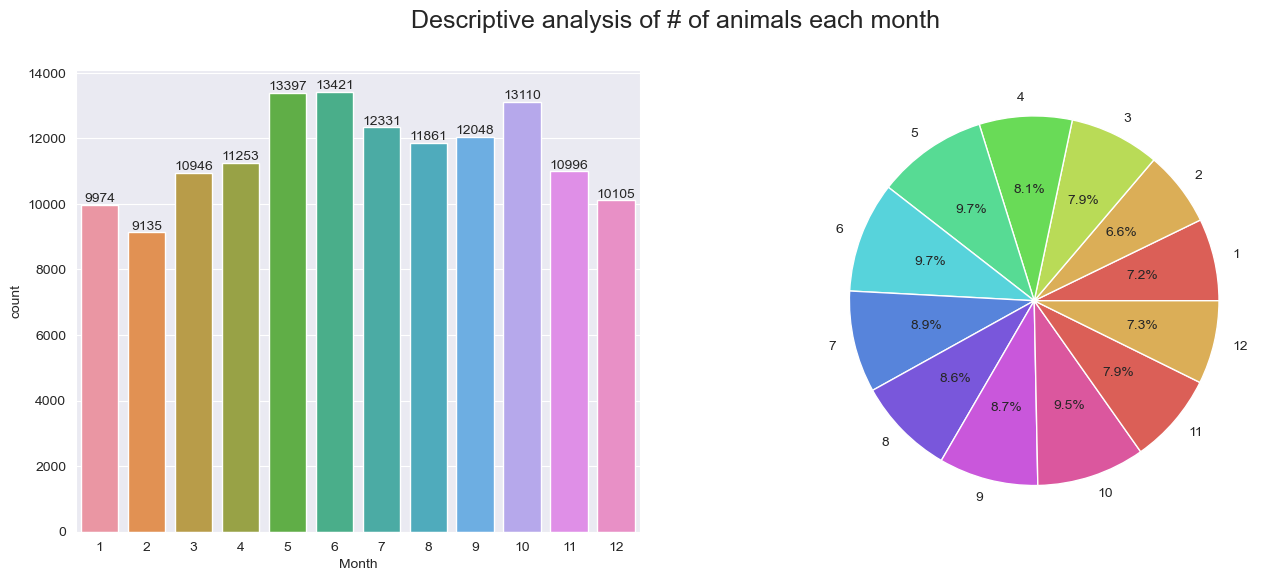

In [107]:
univariate_cat_dt(dataDT, 'Month', 'Descriptive analysis of # of animals each month')

Z těchto grafů vyplývá, že v letních měsích bývá přijato více zvířat než v zimních. A zároveň je hezky vidět pokles přijiímání v letech 2020 a 2021 oproti předchozím v důsledku coronavirové pandemie.

Nyní se podíváme se příznak `Age upon Intake`. Nyní se jedná o spojitý příznak.

In [108]:
age = pd.DataFrame(intakes['Age upon Intake'])

In [109]:
# Taken from 4th notebook of BI-VIZ course
def univariate_cont_ds(df, column, title):
    stats_df = pd.DataFrame(np.array([
        ["Minimal value", df[column].min()], 
        ["Maximal value", df[column].max()], 
        ["Range", df[column].max() - df[column].min()],
        ["Average", df[column].mean()],
        ["Median", df[column].median()],
        ["Variance", df[column].var()]
    ]), columns=['Title', 'Value'])
    
    display(stats_df)
    
    # figure layout initialization
    fig = plt.figure(figsize=(10,10), constrained_layout=True)
    fig.suptitle(title, fontsize = 18)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    ax1 = fig.add_subplot(spec[0, :]) 
    ax2 = fig.add_subplot(spec[1, 0]) 
    ax3 = fig.add_subplot(spec[1, 1])
    
    sns.histplot(data=df, x=column, kde=True, ax=ax1)
    
    # x and y - rotation of plots
    sns.boxplot(data=df, y=column, ax=ax2, medianprops={"color": "pink"})
    sns.violinplot(data=df, y=column, ax=ax3)

,Title,Value
0,Minimal value,0
1,Maximal value,1564
2,Range,1564
3,Average,105.41705333496901
4,Median,52.0
5,Variance,22198.535380011792


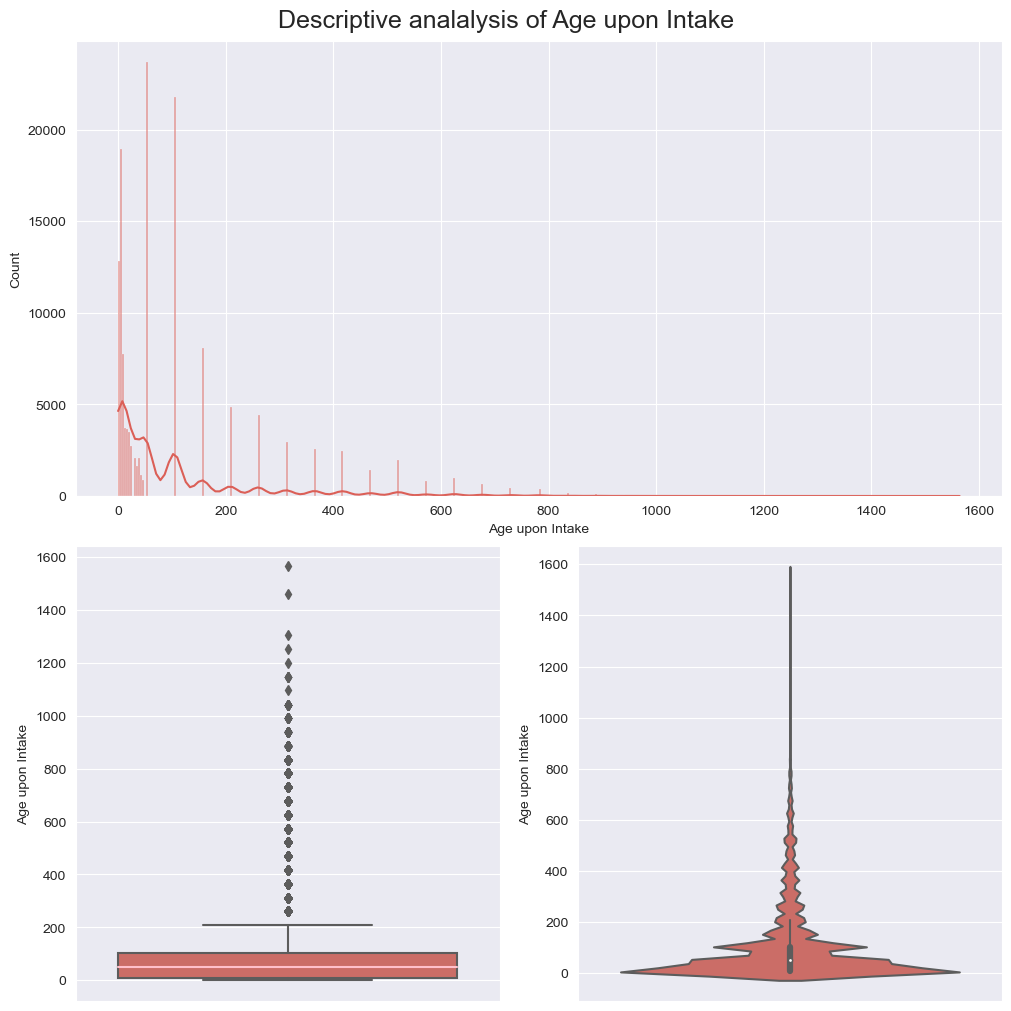

In [110]:
univariate_cont_ds(age, 'Age upon Intake', 'Descriptive analalysis of Age upon Intake')

Toto se příliš nepovedlo kvůli odlehlým hodnotám.

In [111]:
age['Age upon Intake'] = age[age['Age upon Intake'].between(age['Age upon Intake'].quantile(0.1),age['Age upon Intake'].quantile(0.90))]

,Title,Value
0,Minimal value,4.0
1,Maximal value,312.0
2,Range,308.0
3,Average,74.70524002110075
4,Median,52.0
5,Variance,5900.171444069305


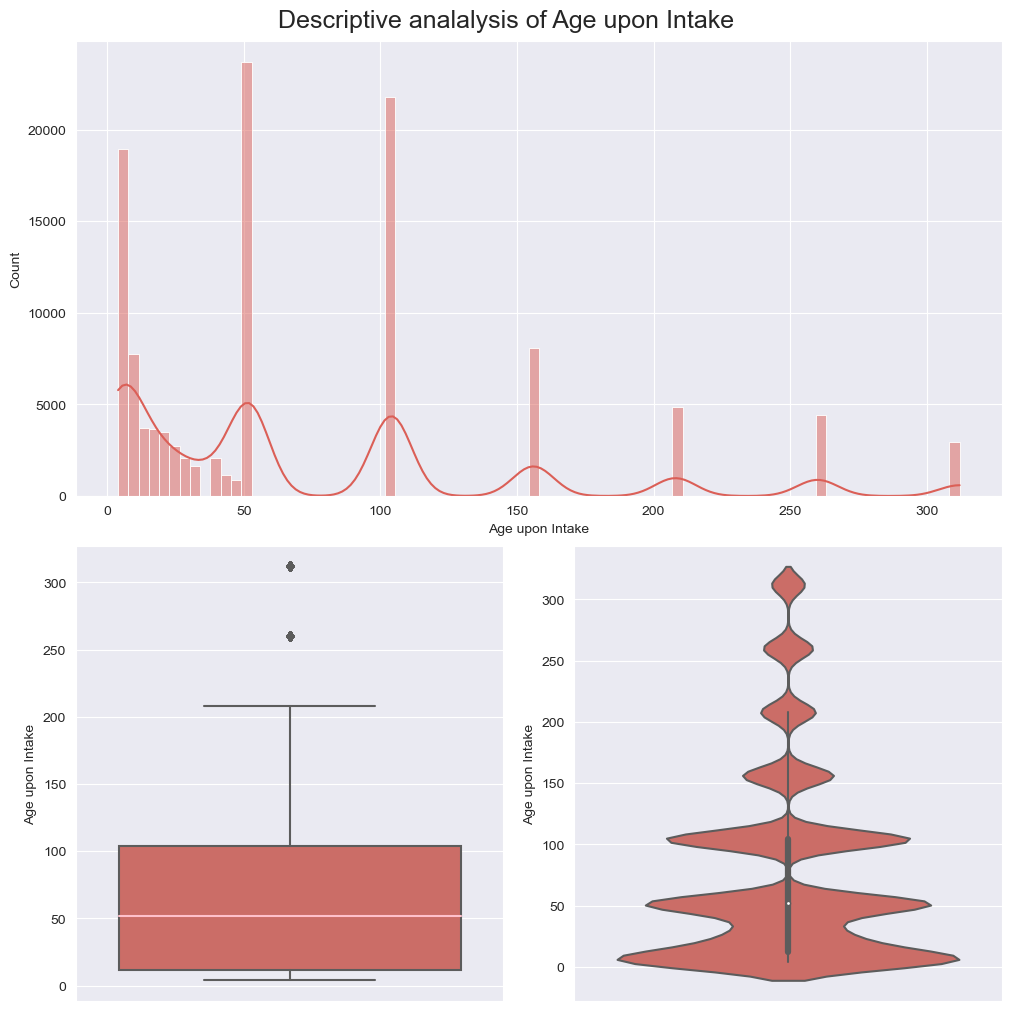

In [112]:
univariate_cont_ds(age, 'Age upon Intake', 'Descriptive analalysis of Age upon Intake')

Toto už je o něco lepší, nicméně můžeme z těchto grafů vidět, že jsou data velmi nepřesná, jelikož je jasně vidět, že věky nejsou rozloženy rovnoměrně a jsou jistým způsobem zmanipulované.

Nyní uděláme analýzu dalších tří příznaků `Animal Type`, `Intake Type` a `Sex upon Intake`. Všechno jsou to kategorické příznaky.

In [113]:
# Taken from 4th notebook of BI-VIZ course
def univariate_cat_dt2(df, column, title):
    stats_df = pd.DataFrame(data={
        'Frequency': df[column].value_counts(),
        'Relative frequency': df[column].value_counts(normalize=True) 
    })
    # stats_df.sort_index(inplace=True)
    display(stats_df)
    mode = pd.DataFrame(np.array([
        ["Mode", df[column].mode()[0]], 
    ]), columns=['Name', 'Value'])
    mode.set_index('Name', inplace=True)
    display(mode)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8))
    fig.suptitle(title, fontsize = 18)
    sns.countplot(data=df, x=column, order = df[column].value_counts().index, ax=ax1)
    
    ax1.bar_label(ax1.containers[0])
    
    patches, texts, autotexts = ax2.pie(stats_df['Frequency'], labels=stats_df.index, autopct='%1.1f%%')
    texts[-1]._y += 0.03
    autotexts[-1]._x += 0.2


,Frequency,Relative frequency
Stray,95276,0.687531
Owner Surrender,28581,0.206246
Public Assist,8346,0.060226
Wildlife,5375,0.038787
Abandoned,740,0.005340
Euthanasia Request,259,0.001869


,Value
Name,
Mode,Stray


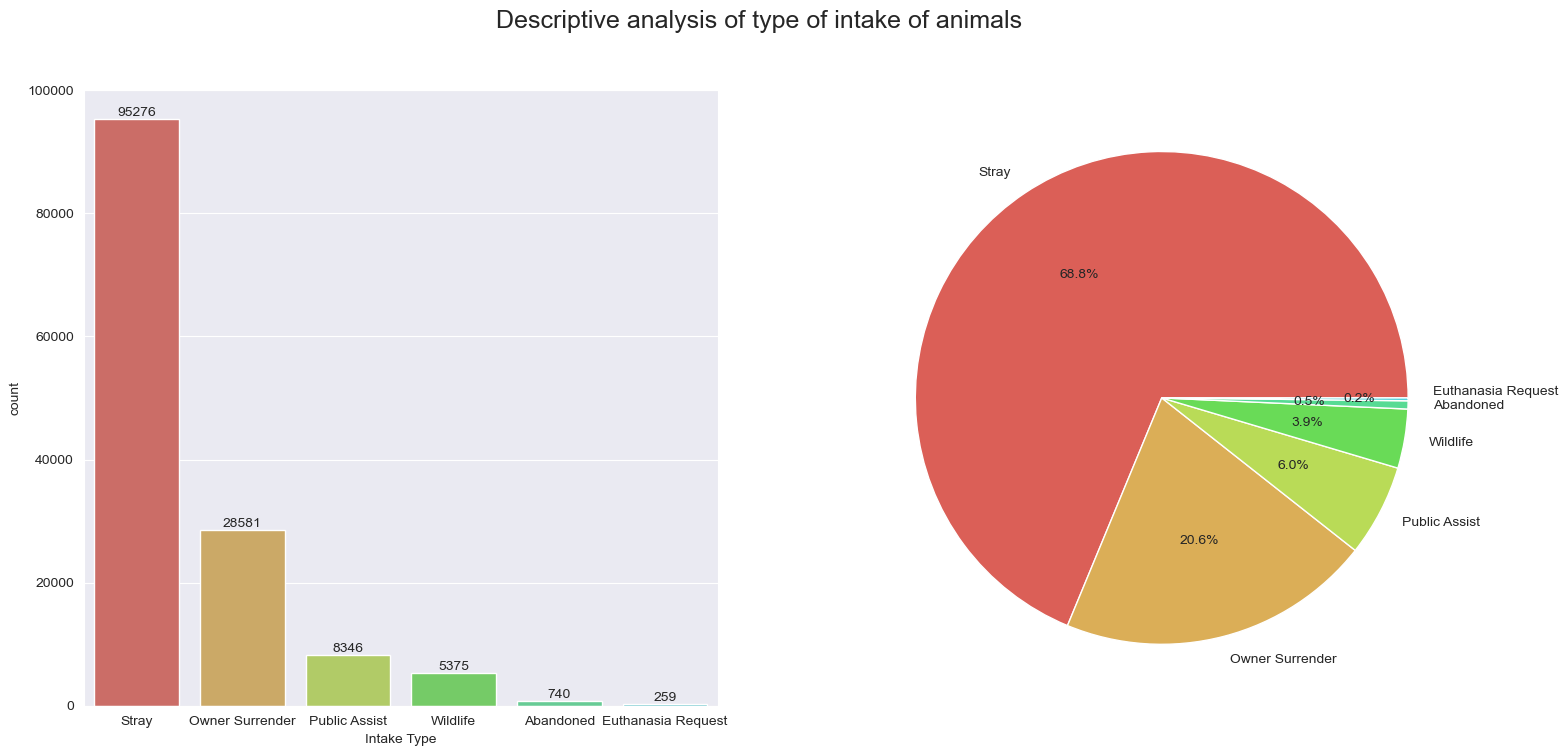

In [114]:
univariate_cat_dt2(intakes, 'Intake Type', 'Descriptive analysis of type of intake of animals')


Zdaleka největší podíl mají toulavá zvířata.

,Frequency,Relative frequency
Dog,78137,0.563853
Cat,52380,0.377985
Other,7375,0.053220
Bird,661,0.004770
Livestock,24,0.000173


,Value
Name,
Mode,Dog


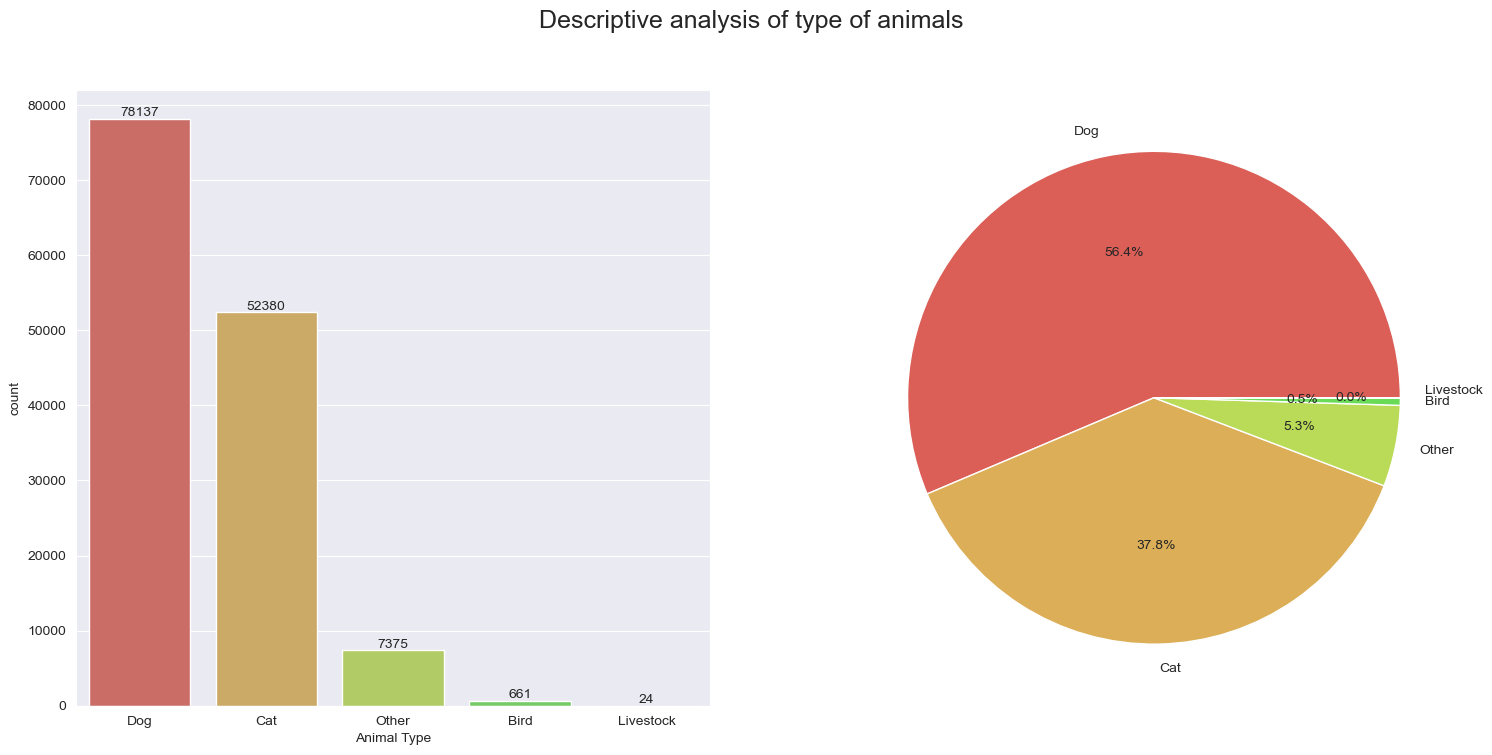

In [115]:
univariate_cat_dt2(intakes, 'Animal Type', 'Descriptive analysis of type of animals')

Zde se nám moc nelíbí, že *Livestock* není vůbec zřetelný a nejlepší bude jej dát do jedné skupiny s *Other*.

In [116]:
animType = pd.DataFrame(intakes['Animal Type'])
animType['Animal Type'] = animType['Animal Type'].replace(['Livestock'], 'Other') 

,Frequency,Relative frequency
Dog,78137,0.563853
Cat,52380,0.377985
Other,7399,0.053393
Bird,661,0.004770


,Value
Name,
Mode,Dog


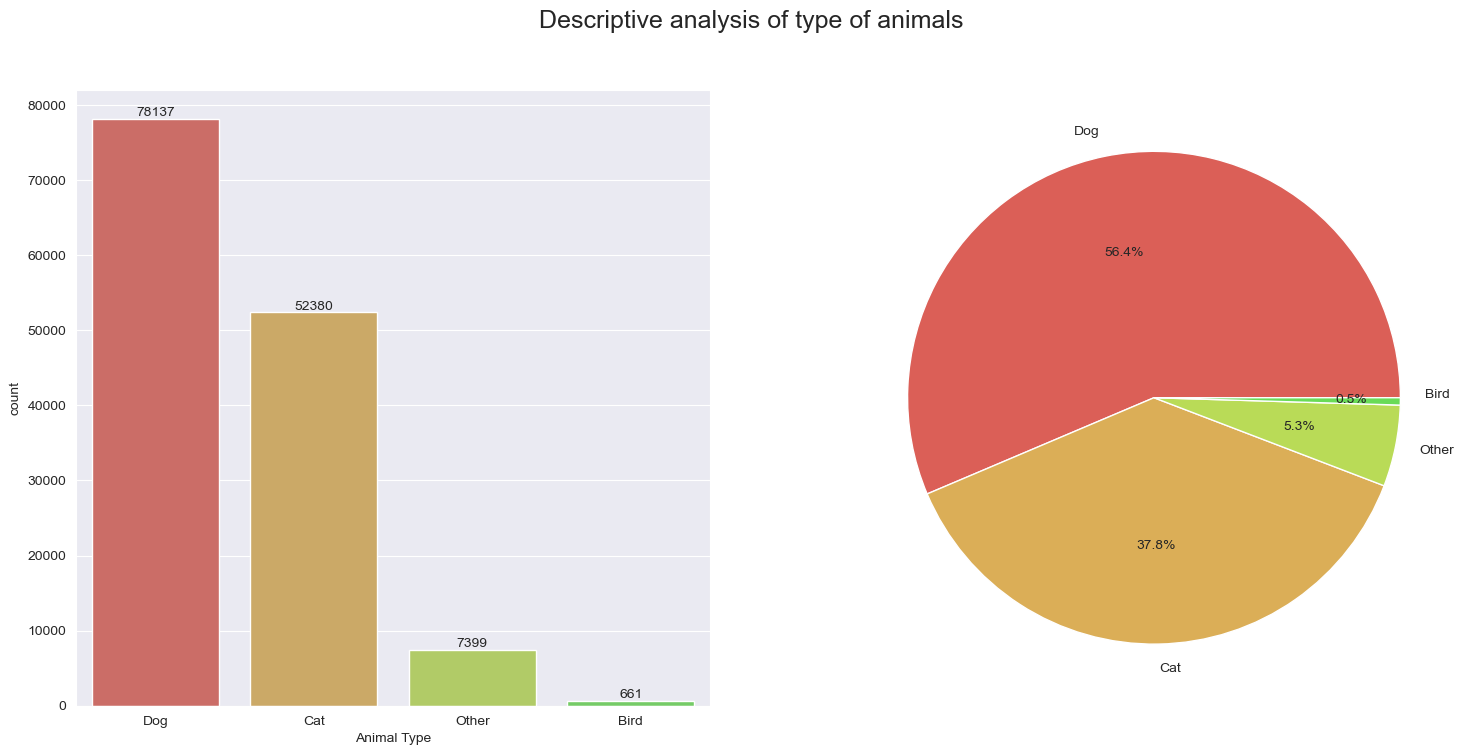

In [117]:
univariate_cat_dt2(animType, 'Animal Type', 'Descriptive analysis of type of animals')

To už vypadá lépe. Psi a kočky mají majoritní podíl na celkovém počtu přijatých zvířat.

,Frequency,Relative frequency
Intact Male,45634,0.329307
Intact Female,43306,0.312507
Neutered Male,20832,0.150329
Spayed Female,17735,0.127980
Unknown,11069,0.079877


,Value
Name,
Mode,Intact Male


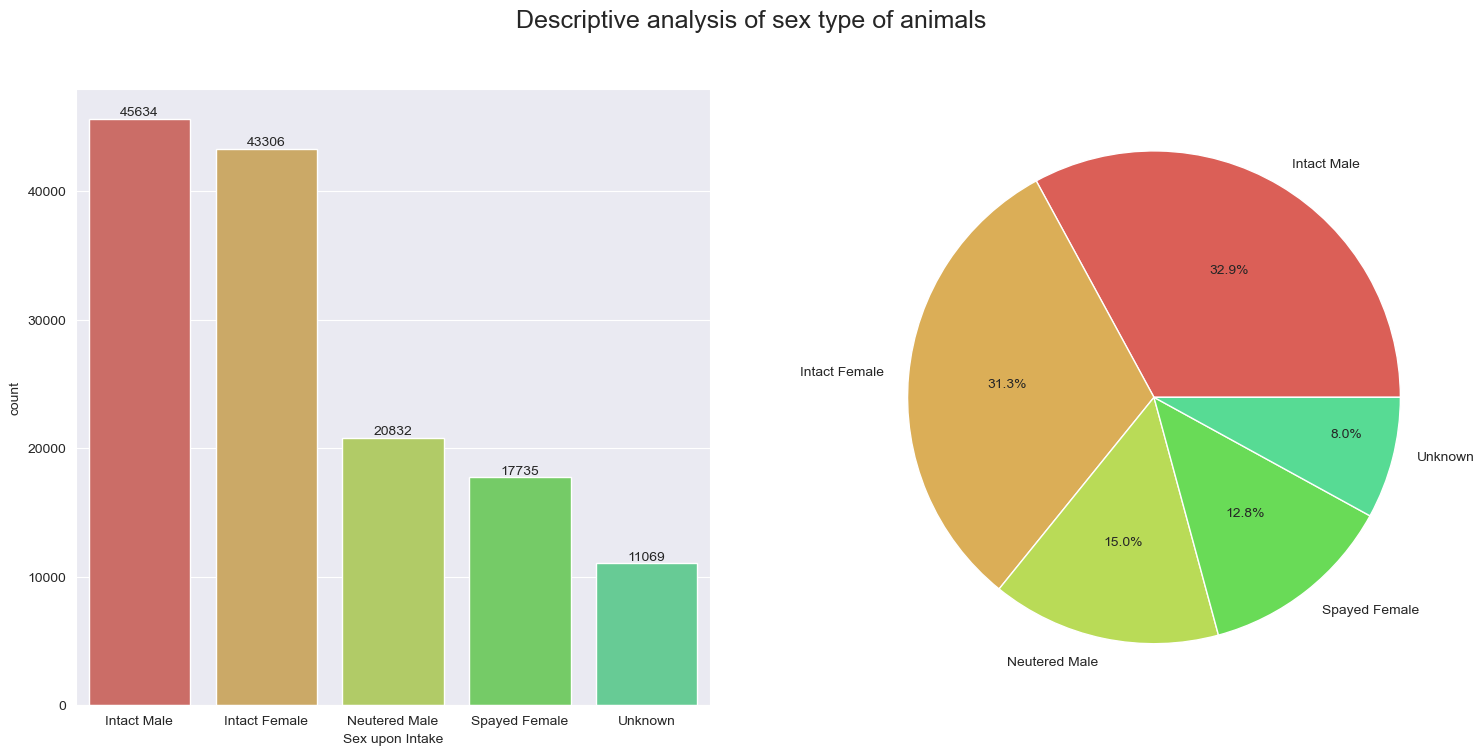

In [118]:
univariate_cat_dt2(intakes, 'Sex upon Intake', 'Descriptive analysis of sex type of animals')

Vzhledem k velkému počtu zbloudilých zvířat není překvapivé, že většina není kastrovaná a to vidíme na tomto grafu.

Nyní se podíváme na bivariační statistiku příznaků *Sex upon Intake, Animal Type*. Jedná se o kategorické příznaky tudíž použijeme kontigenenční tabulku.

In [119]:
# Taken from 4th notebook of BI-VIZ course
def bivariate_cat_cat_ds(df, categorical1, categorical2, title):
    frequency_table = pd.crosstab(df[categorical1], df[categorical2])
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,8))
    fig.suptitle(title, fontsize = 18)
    
    sns.heatmap(frequency_table, cmap='Blues', annot=True, fmt='g', ax=ax1)
    sns.heatmap(frequency_table.div(len(df)), cmap='Blues', annot=True, fmt='g', ax=ax2)

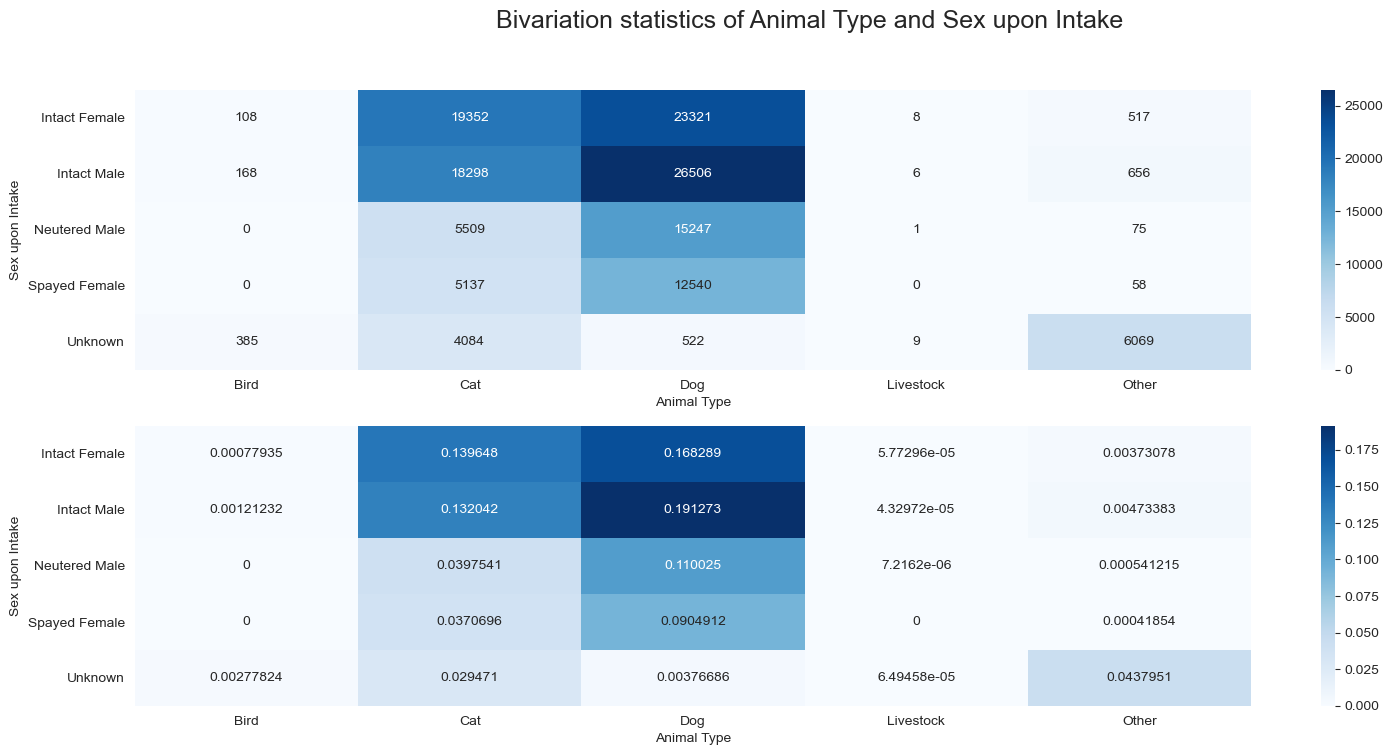

In [120]:
bivariate_cat_cat_ds(intakes, 'Sex upon Intake', 'Animal Type', 'Bivariation statistics of Animal Type and Sex upon Intake')

Z tohoto grafu můžeme vyčíst, že psi bývají častěji kastrovaní než kočky.

## Zadané otázky

#### 1. Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.

In [121]:
intakeNew = intakes[['Animal ID', 'Intake Type' ]].drop_duplicates(subset=['Animal ID']) 
outcomeNew = outcomes[['Animal ID', 'Outcome Type' ]].drop_duplicates(subset=['Animal ID']) 

In [122]:

merged = intakeNew.merge(outcomeNew, on = ['Animal ID'])

Můžeme se pokusit využít bivariační statistiku, kterou už máme napsanou.

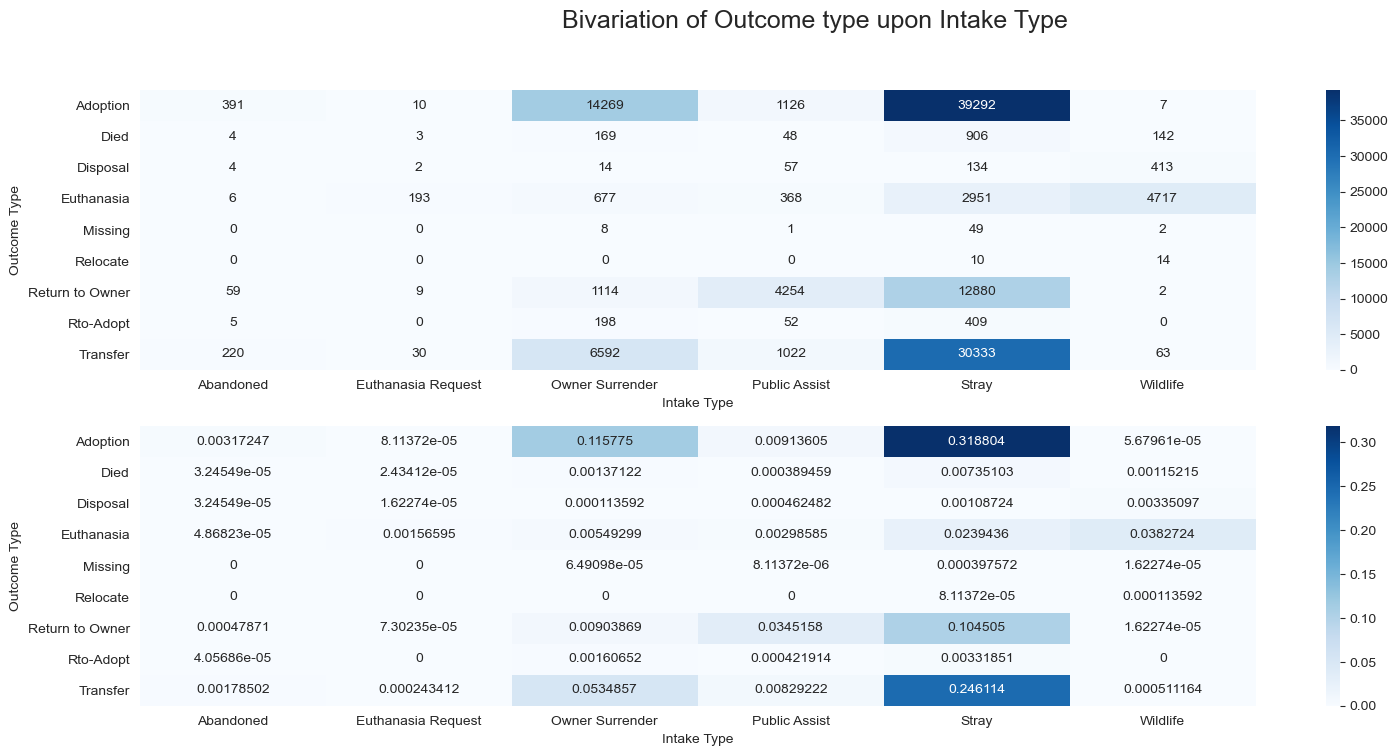

In [123]:
bivariate_cat_cat_ds(merged,'Outcome Type', 'Intake Type', 'Bivariation of Outcome type upon Intake Type')

Takový graf nám dává všechny informace, ale je pro čtenáře těžko pochopitelný, tudíž využijeme jiné vizualizace.

In [124]:
#sns.displot(data=merged, x='Intake Type', col='Outcome Type', stat = 'density', col_wrap = 3, common_norm = False)
grouped = merged.groupby('Intake Type')['Outcome Type'].value_counts(normalize=True)
grouped.mul(100)
grouped = grouped.rename('percent').reset_index()
grouped.rename(columns={"level_1": "Outcome Type"}, inplace = True)

Text(0.5, 0.98, 'Percentage of Outcome types over given Intake type')

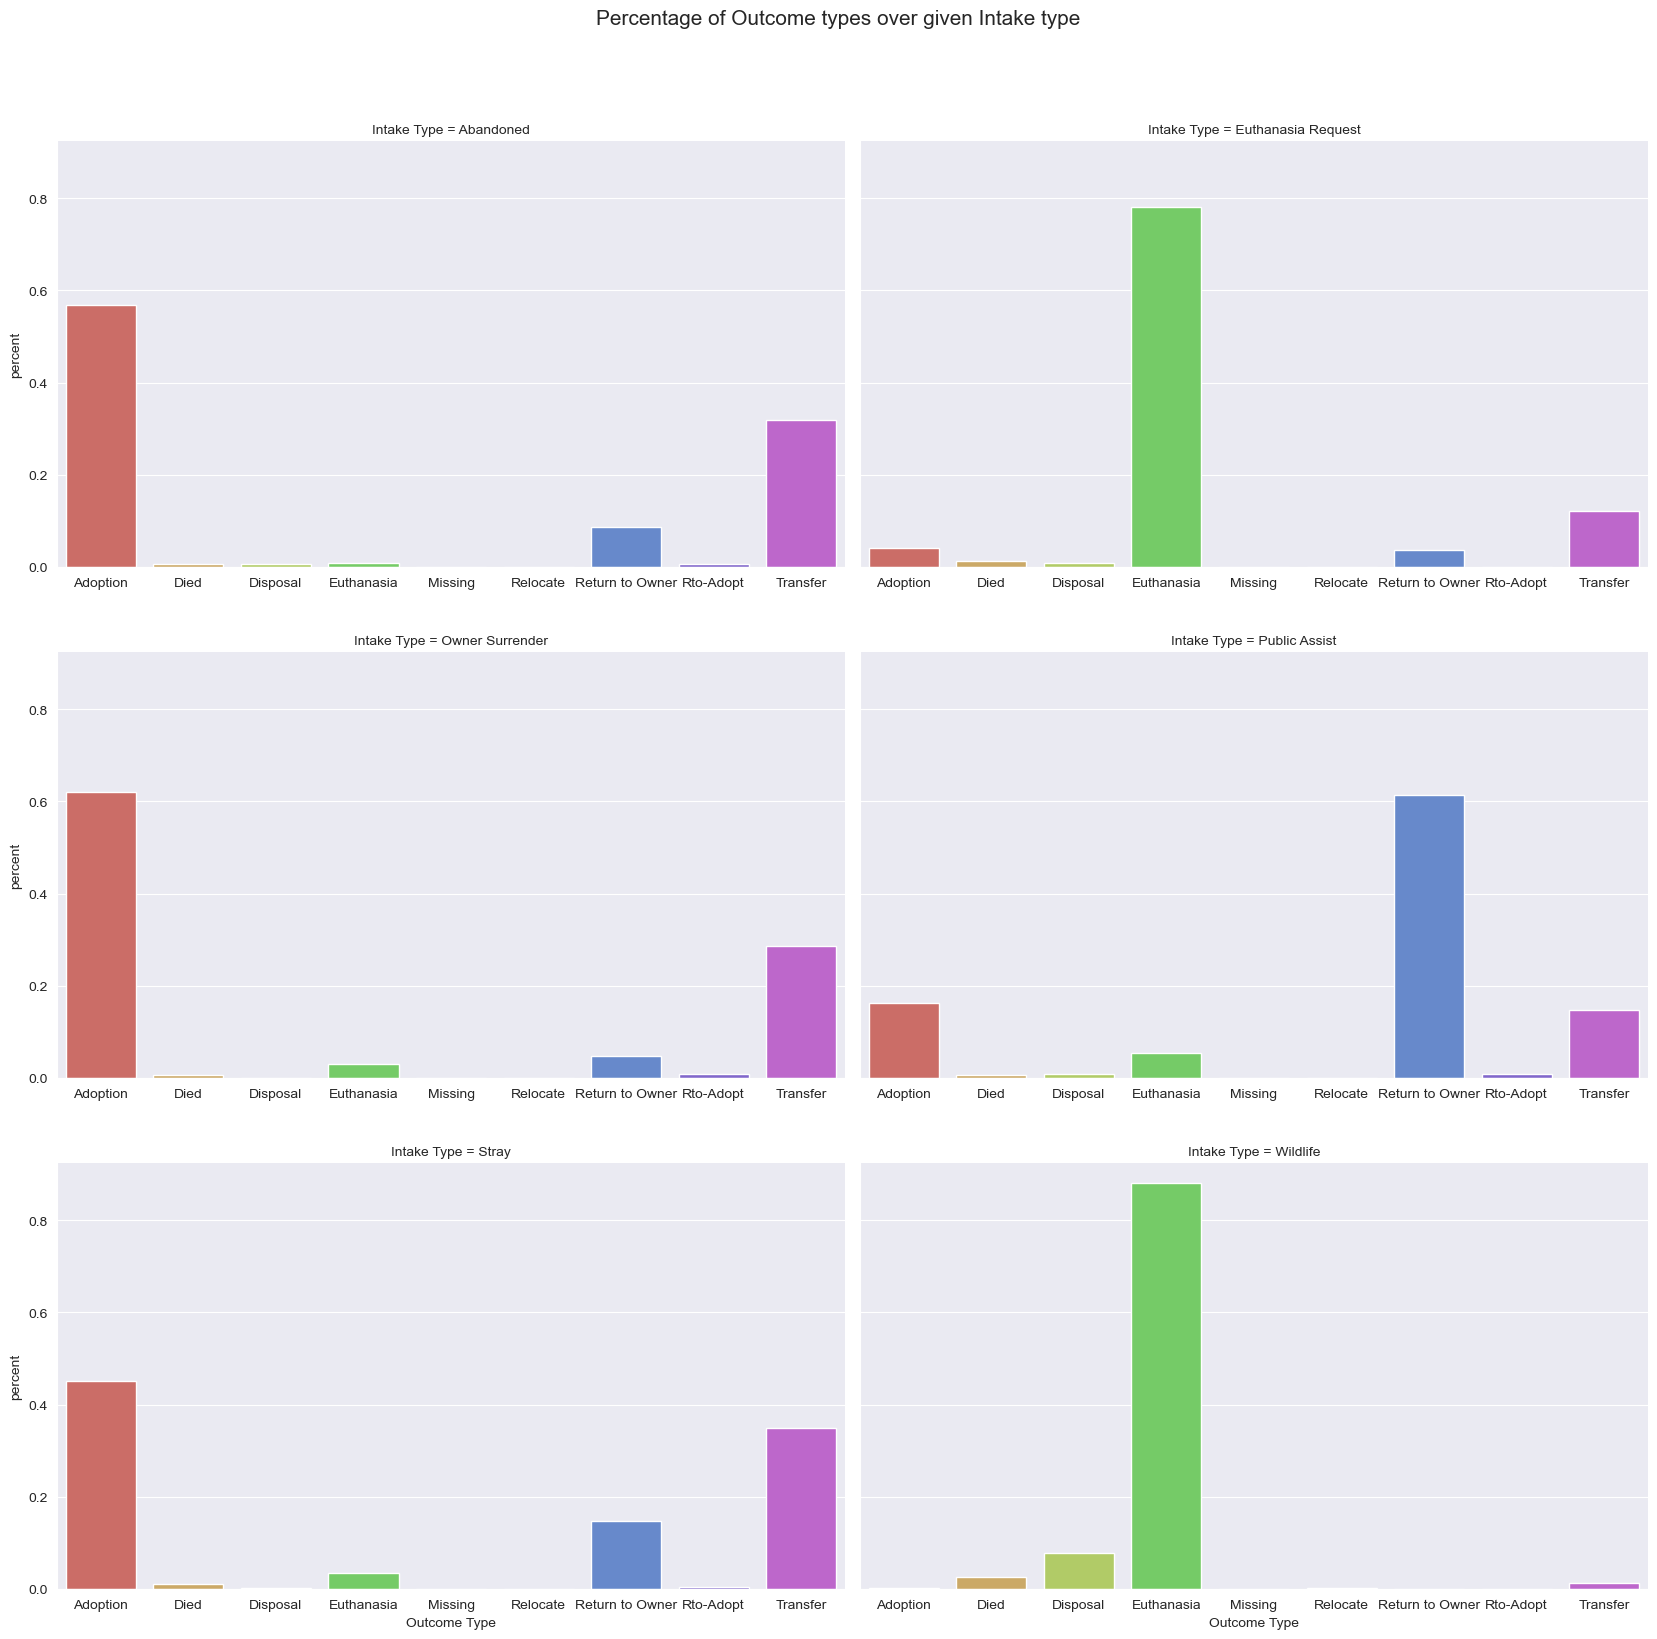

In [125]:

g = sns.catplot(data=grouped, col='Intake Type',y='percent',x='Outcome Type',kind='bar', col_wrap = 2, legend_out=False, height=5.5, aspect=1.5)
for ax in g.axes:
    ax.tick_params(labelbottom=True)
    plt.subplots_adjust(hspace=0.2, top = 0.1)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Percentage of Outcome types over given Intake type', fontsize = 15)


Z tohoto krásně vidíme, že *Outcome type* vskutku závisí na *Income type*. Například je vidět, že při *Intake type* Euthanasia request, tak je důsledek vskutku eutanázie zvířete, což není překvapivé. Co je naopak překvapivé je fakt, že divoká zvířata (Wildlife) ve většině případů dostanou eutanázii.
Zároveň vidíme, že když je zvíře do útulku donešeno okolím (Public Assist), tak se spíše jedná o ztraceného mazlíčka a je ve většině případů vrácen majiteli.

#### 2. Hraje věk zvířete roli při adopci?

Rozdělíme si data do věkových podskupin, které budou stejně početné. Nabízí se využít intervaly oddělené dolním a horním kvartilem a mediánem.

In [126]:
# age['Age upon Intake'] = age[age['Age upon Intake'].between(age['Age upon Intake'].quantile(0.1),age['Age upon Intake'].quantile(0.90))]
adop = outcomes[['Age upon Outcome', 'Outcome Type']].copy()


In [127]:
lowerQuan = adop['Age upon Outcome'].quantile(0.25)
median = adop['Age upon Outcome'].quantile(0.5)
upperQuan = adop['Age upon Outcome'].quantile(0.75)


def getInterval(age:int):
    if(age <= lowerQuan):
        return '0-' + str(lowerQuan)
    elif(age < median):
        return str(lowerQuan + 1) + '-' + str(median)
    elif(age <= upperQuan):
        return str(median + 1) + '-' + str(upperQuan)
    return str(upperQuan + 1) + '-'

In [128]:
adop['interval'] = adop['Age upon Outcome'].apply(getInterval)
groupedAdop = adop.groupby(['interval'])['Outcome Type'].value_counts(normalize = True)
gr = pd.DataFrame(groupedAdop)
AdopRate = pd.DataFrame(gr.unstack()['Outcome Type']['Adoption'])
AdopRate = AdopRate.reindex(['0-12.0', '13.0-52.0', '53.0-104.0', '105.0-'])
AdopRate.reset_index(inplace = True)

Text(0.5, 0, 'Animal age in weeks')

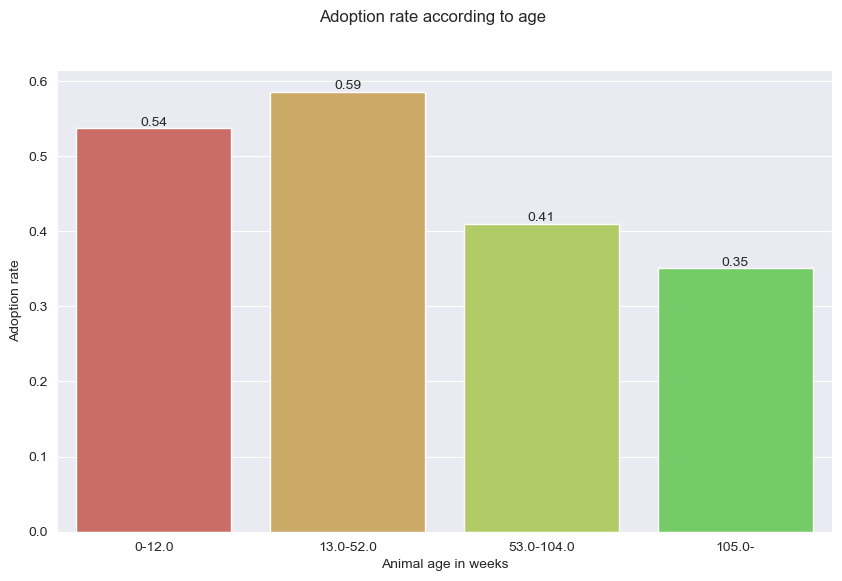

In [129]:
fig, ax1 = plt.subplots(figsize=(10,6))
fig.suptitle('Adoption rate according to age')
sns.barplot(data=AdopRate, x = 'interval', y = 'Adoption', ax = ax1)
ax1.bar_label(ax1.containers[0], fmt='%.2f')
ax1.set_ylabel('Adoption rate')
ax1.set_xlabel('Animal age in weeks')

Z tohoto vidíme, že jistý vliv věk zvířete na adopci má. Zvířata do jednoho roku mají znatelně vyšší šance k adopci, ale není to tak razantní.

#### 3. Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

Využijeme graf z deskriptivní analýzy `DateTime`. A uděláme nový pro každý jednotlivý rok zvlášť.

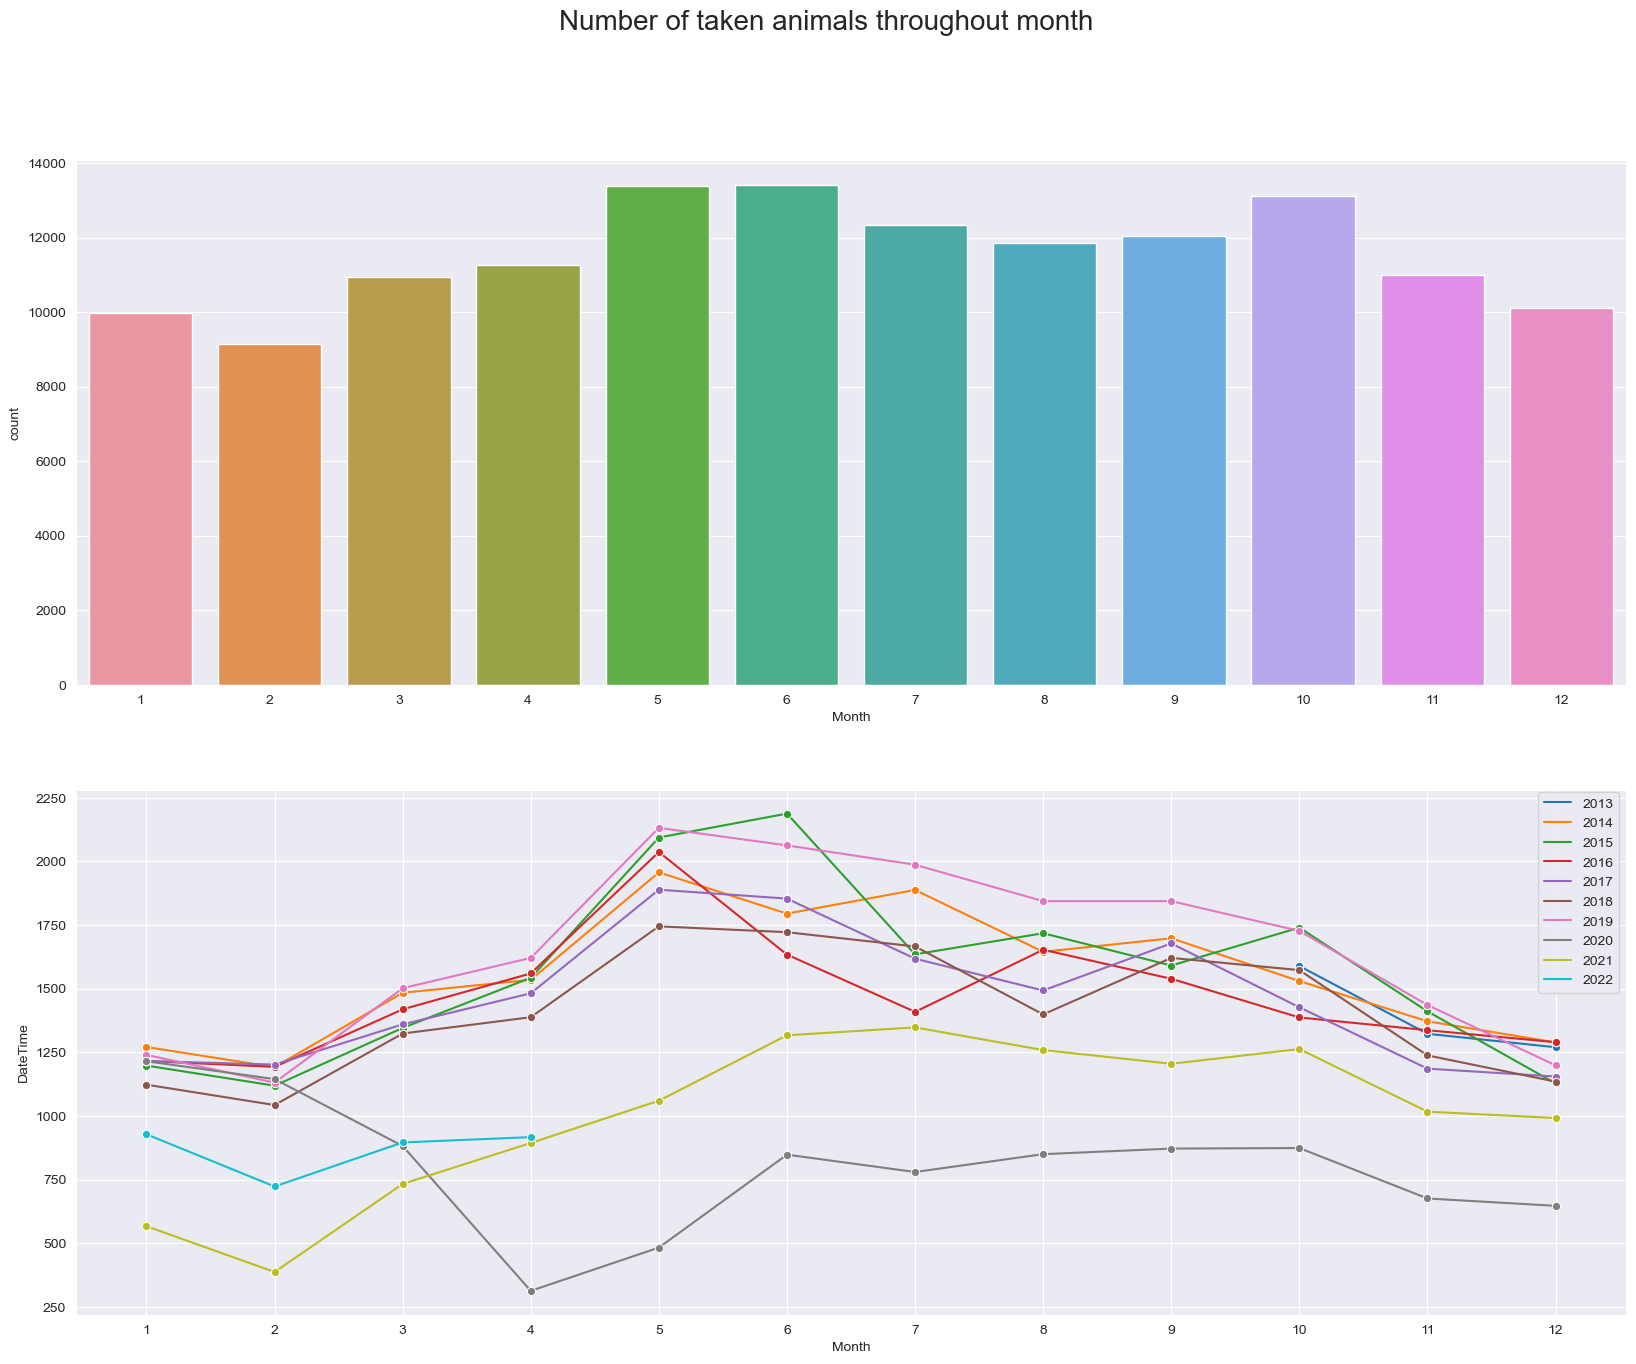

In [130]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
fig.suptitle('Number of taken animals throughout month', fontsize = 20)
sns.countplot(data=dataDT, x='Month', ax=ax1)

modDT = dataDT.groupby(['Year', 'Month']).count()
ax2.set_xticks(range(1, 13, 1))
g = sns.lineplot(data=modDT, x="Month", y="DateTime", hue="Year",palette="tab10", marker='o', ax= ax2)
g.legend(loc='lower right', bbox_to_anchor=(1, 0.6), ncol=1)


None

Z těchto grafů můžeme vyvodit, že obecně je příjem zvířat nejvyšší v létě a nižší bývá v zimě.

## Vlastní otázky

#### 1. Je přijmutý druh zvířete závislý na období v roce?

In [131]:
anim = intakes[['Animal Type', 'DateTime']].copy()
anim['Month'] = anim['DateTime'].dt.month
anim['Animal Type'] = anim['Animal Type'].replace(['Livestock'], 'Other') 
anim

,Animal Type,DateTime,Month
0,Dog,2019-01-03 16:19:00,1
1,Dog,2015-07-05 12:59:00,7
2,Dog,2016-04-14 18:43:00,4
3,Cat,2013-10-21 07:59:00,10
4,Dog,2014-06-29 10:38:00,6
...,...,...,...
138580,Cat,2022-04-27 07:54:00,4
138581,Dog,2022-04-23 13:32:00,4
138582,Dog,2022-04-23 13:32:00,4
138583,Dog,2022-04-23 14:44:00,4


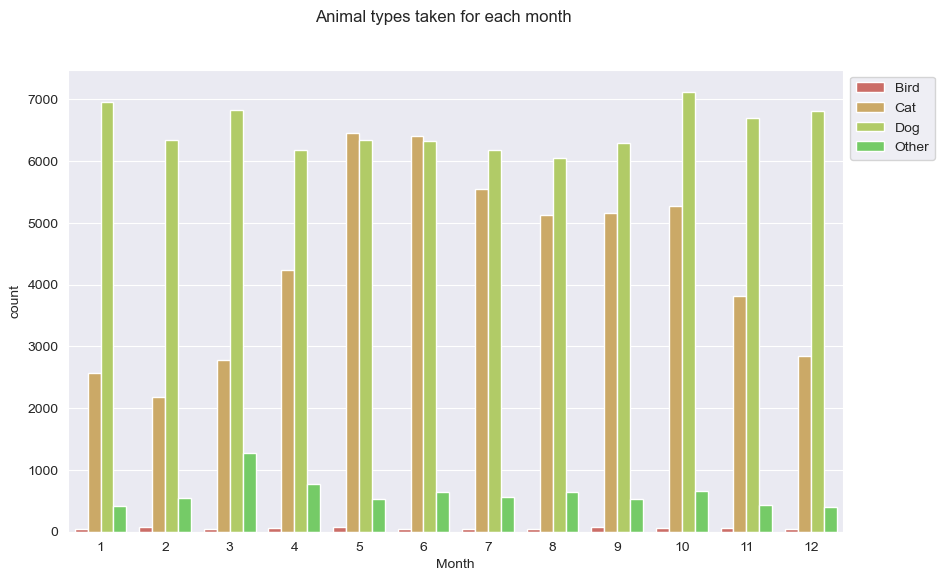

In [132]:
fig, ax1 = plt.subplots(figsize=(10,6))
fig.suptitle('Animal types taken for each month')
g = sns.countplot(data=anim, x= 'Month', hue='Animal Type', ax = ax1)
g.legend(loc='upper left', bbox_to_anchor=(1, 1))
None

Z tohoto grafu můžeme jednoduše vyčíst zajímavý fakt, že v měsících květen a červen jsou přijímány více kočky než psi, což zdaleka neplatí po zbytek roku. Bohužel je relativní počet ptáků velmi malý a nevidíme jej zřetelně a tedy si jej zvizualizujeme zvlášť.

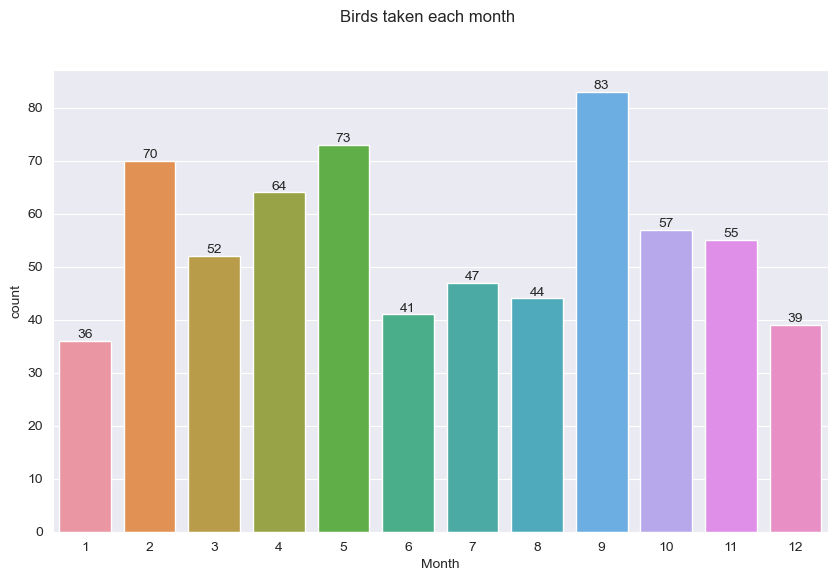

In [133]:
bi = anim[anim['Animal Type'] == 'Bird']
fig, ax1 = plt.subplots(figsize=(10,6))
fig.suptitle('Birds taken each month')
sns.countplot(data=bi, x= 'Month', ax = ax1)
ax1.bar_label(ax1.containers[0])
None

Zajímavé v tomto grafu je fakt, že v září jsou ptáci přijímáni výrazně více než v okolních měsících. Nejspíš způsobeno odletem do teplejších krajin, neboť vidíme, že na jaře je počet opět naroste. 

#### 2. Závisí stav zvířete na typu příchodu?

In [134]:
#sns.displot(data=merged, x='Intake Type', col='Outcome Type', stat = 'density', col_wrap = 3, common_norm = False)
cond = intakes.groupby('Intake Type')['Intake Condition'].value_counts(normalize=True)
cond.mul(100)
cond = cond.rename('percent').reset_index()
cond.rename(columns={"level_1": "Intake Condition"}, inplace = True)
cond

,Intake Type,Intake Condition,percent
0,Abandoned,Normal,0.794595
1,Abandoned,Nursing,0.112162
2,Abandoned,Sick,0.036486
3,Abandoned,Neonatal,0.024324
4,Abandoned,Injured,0.013514
...,...,...,...
85,Wildlife,Med Attn,0.000000
86,Wildlife,Med Urgent,0.000000
87,Wildlife,Panleuk,0.000000
88,Wildlife,Pregnant,0.000000


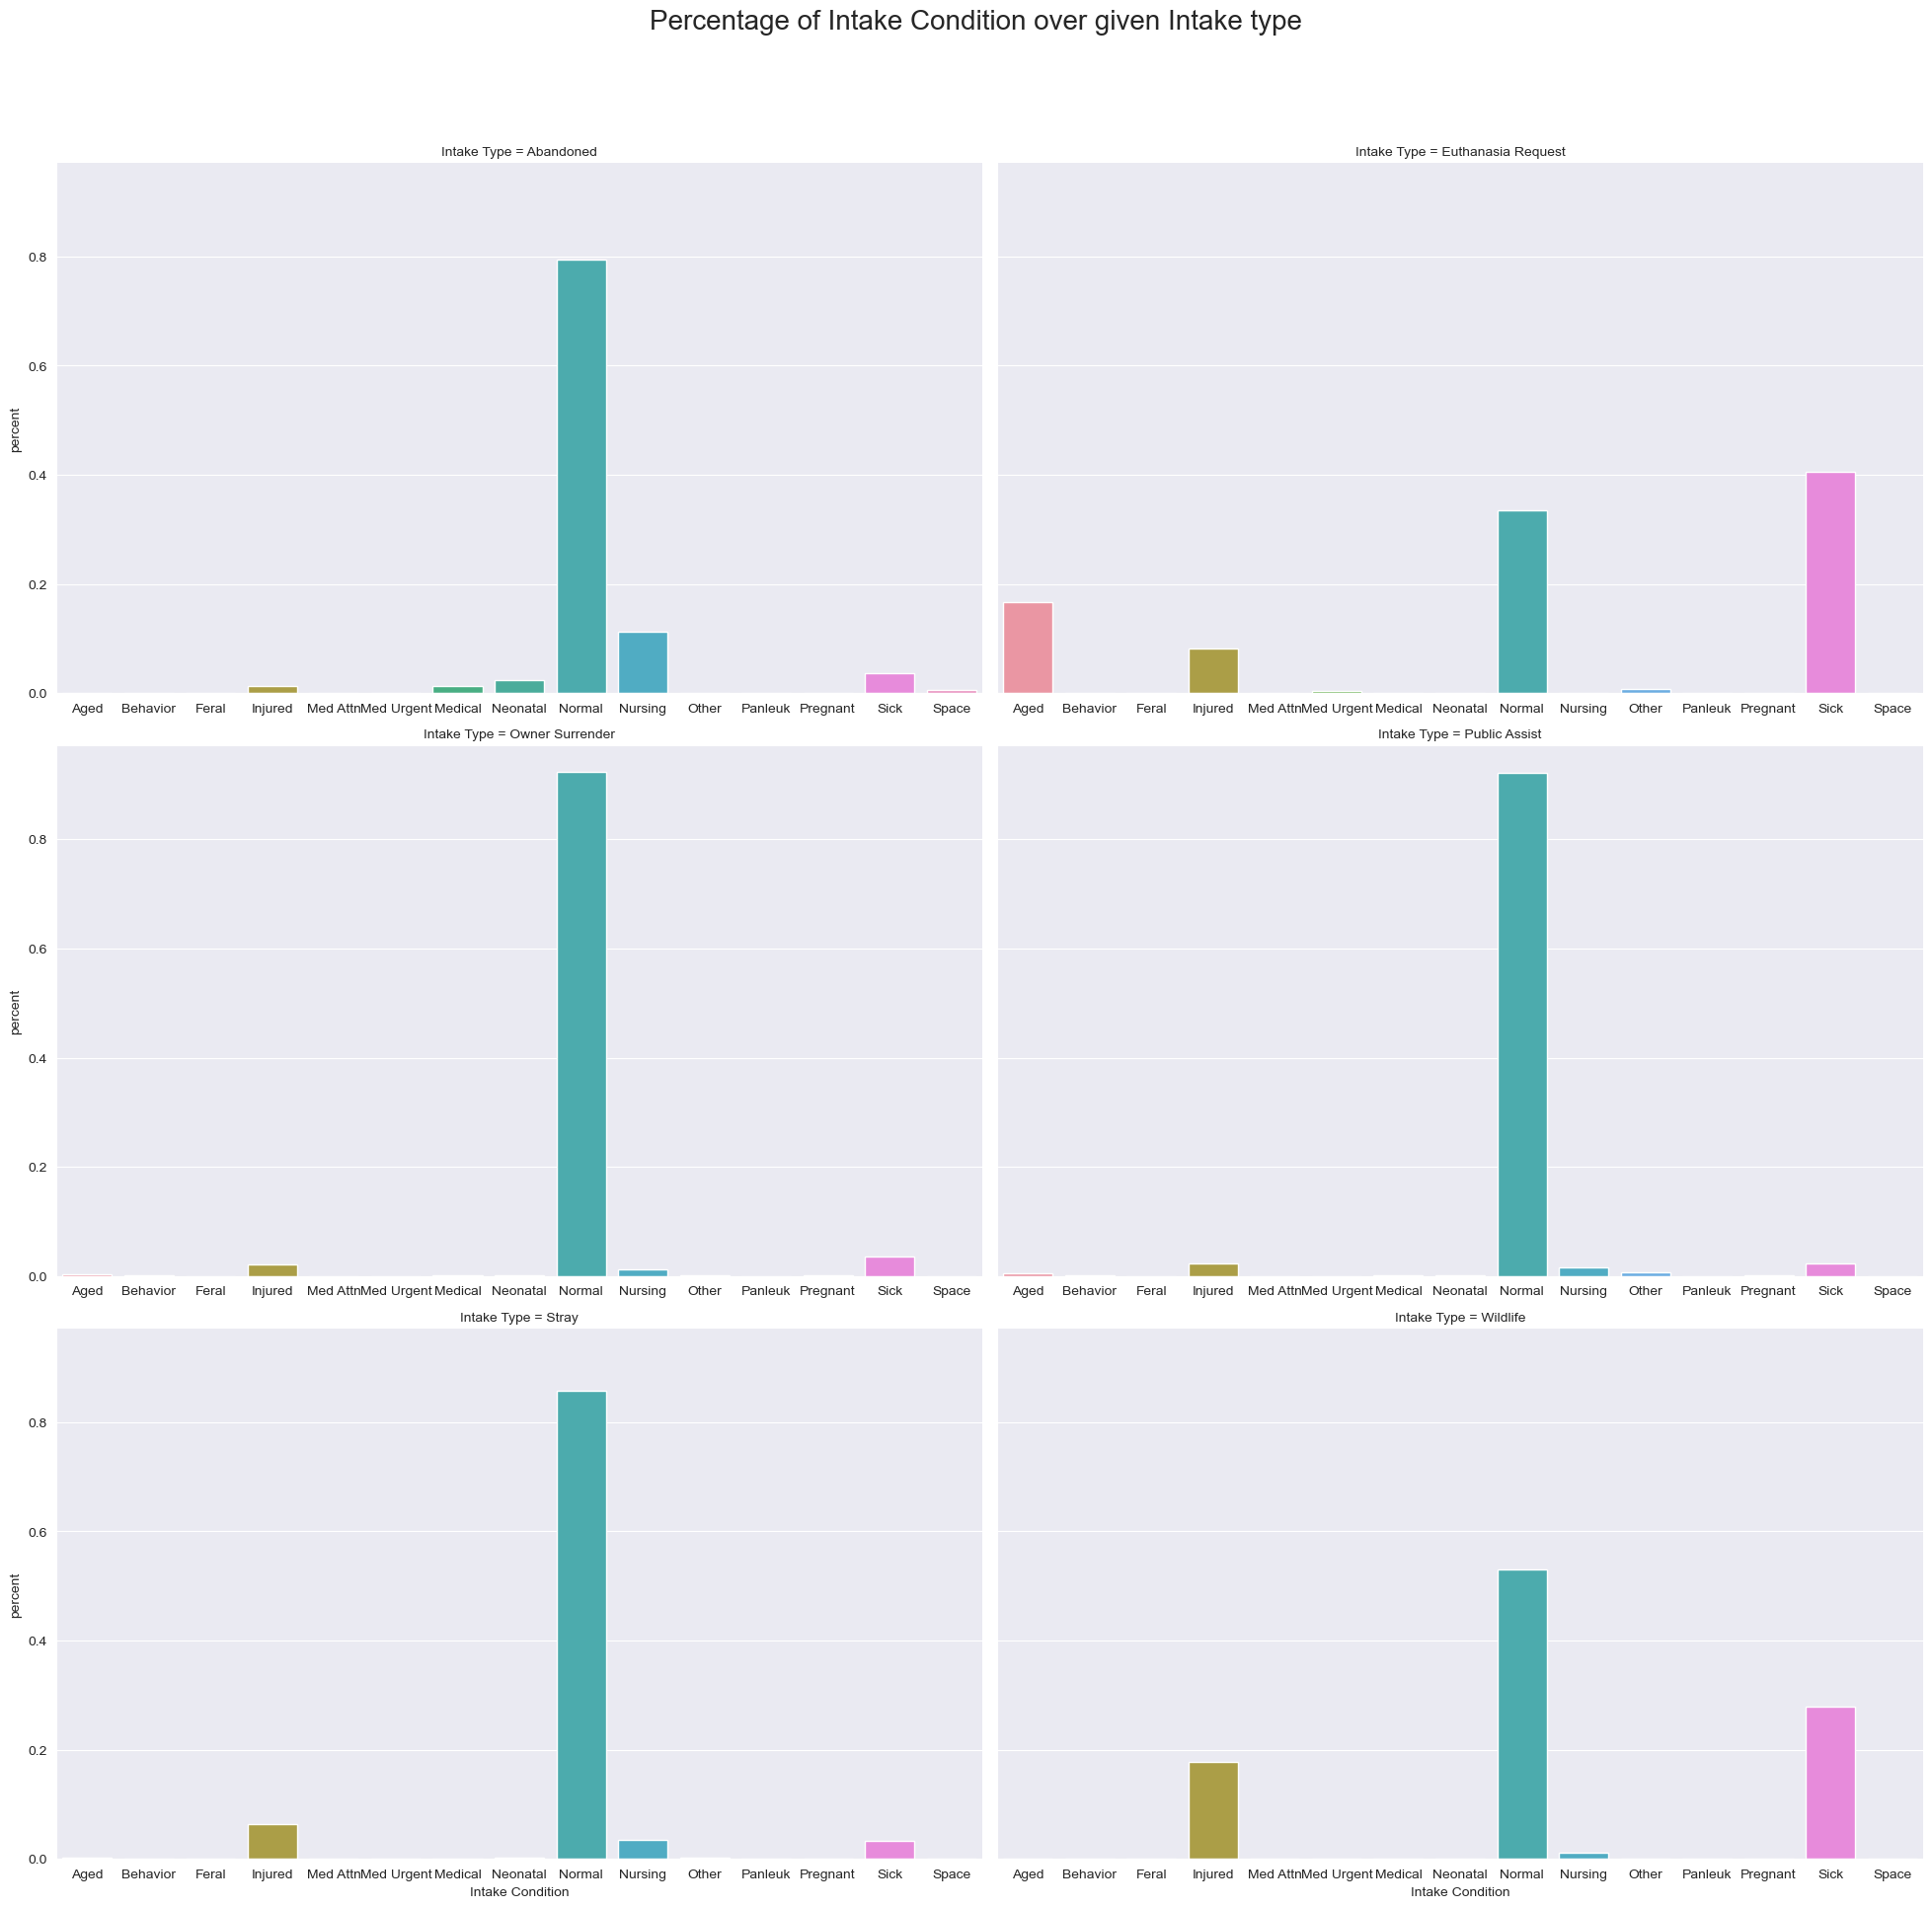

In [135]:

g = sns.catplot(data=cond, col='Intake Type',y='percent',x='Intake Condition',kind='bar', col_wrap = 2, legend_out=False, height=6.5, aspect=1.5)
for ax in g.axes:
    ax.tick_params(labelbottom=True)
    plt.subplots_adjust(hspace=0.1, top = 0.05)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Percentage of Intake Condition over given Intake type', fontsize = 20)
None


Z této vizualizace jsme mohli vyčíst, že zvířata přijmuta k eutanázii byla často stará nebo nemocná, což není nic překvapivého. Též je zajímavé, že divoká zvířata jsou přijata často kvůli nemoci, či zranění.

#### 3. Jaká jsou nejoblíbenější psí plemena k adopci?

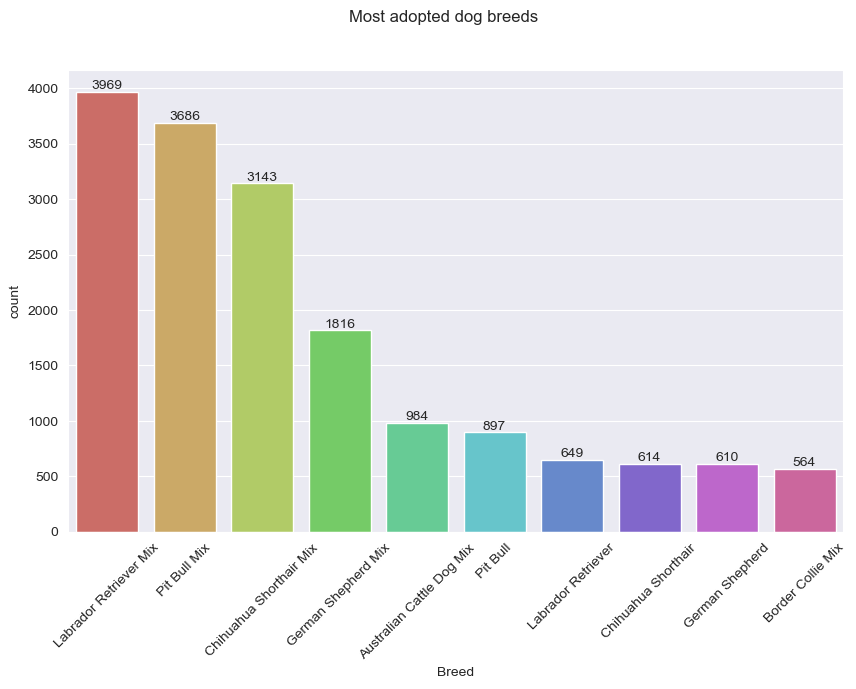

In [136]:
breed = outcomes[['Breed', 'Outcome Type', 'Animal Type']]
breed = breed[(breed['Animal Type'] == 'Dog' ) &  (breed['Outcome Type'] == 'Adoption' )]

fig, ax1 = plt.subplots(figsize=(10,6))
fig.suptitle('Most adopted dog breeds')
g = sns.countplot(data=breed, x= 'Breed', order=pd.value_counts(breed['Breed']).iloc[:10].index, ax = ax1)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
ax1.bar_label(ax1.containers[0])
None

Můžeme vyčíst, že v Americe čistá plemena moc obvyklá nejsou. Nejoblíbenějšími plemeny jsou Labrador Retriever Mix a Pitbull Mix.